# Exploratory Data Analysis

In [67]:
# !pip install geopandas

In [134]:
# Libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from shapely.geometry import Point,Polygon
import geopandas as gpd
import descartes
from datetime import datetime
import scipy.stats as stats

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [135]:
df = pd.read_csv('./Data/data_cleaned_df.csv')

In [136]:
df.head()

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
0,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,0,1999,gravity,vwc,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,Other,Missing,1,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013
2,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,1,2009,gravity,vwc,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013
3,need repair,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,Missing,1,1986,submersible,vwc,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013
4,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,0,True,None,Missing,1,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011


In [137]:
df.permit.value_counts()

1    40347
0    19053
Name: permit, dtype: int64

In [139]:
df.status_group.value_counts()


functional     32259
need repair    27141
Name: status_group, dtype: int64

In [72]:
df.shape

(59400, 30)

In [73]:
drop_cols = []

## Heatmap for correlation

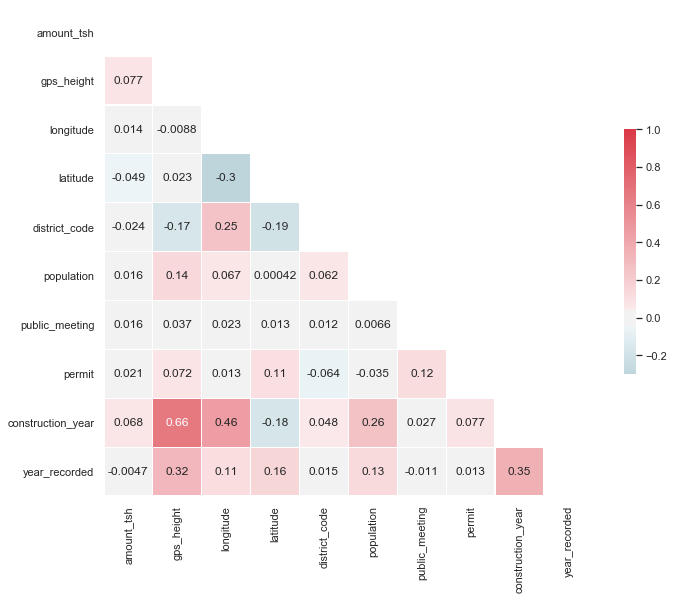

In [74]:
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

## status_group: target variable

First, I want to see status_group distribution which is our target variable.

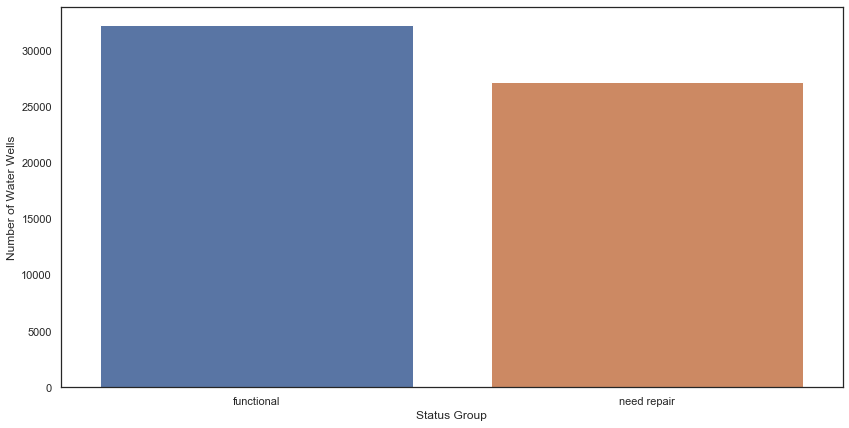

<Figure size 432x288 with 0 Axes>

In [75]:
fig, ax = plt.subplots(figsize = (14,7))
sns.countplot(df['status_group']);
ax.set_xlabel('Status Group');
ax.set_ylabel('Number of Water Wells');
plt.show()
plt.savefig('./plots/target_dist_bar.png', bbox_inches='tight')


In [76]:
df.status_group.value_counts()

functional     32259
need repair    27141
Name: status_group, dtype: int64

Now using pie chart to get a sense of percentages of these status groups.

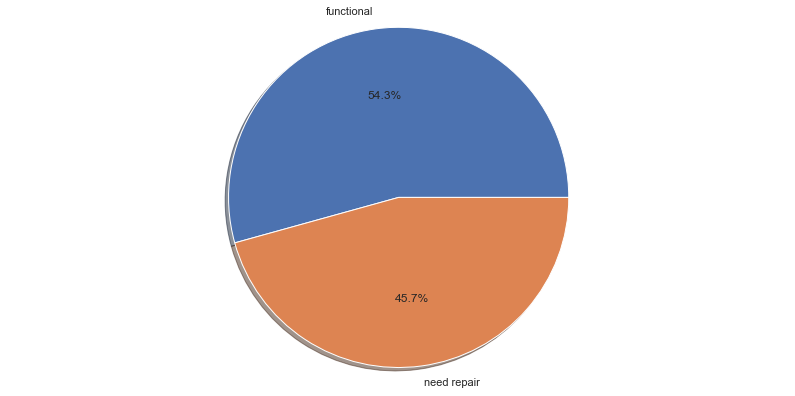

In [77]:
fig, ax = plt.subplots(figsize = (14,7))
sizes = [df['status_group'].value_counts()[0],
         df['status_group'].value_counts()[1],
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
ax.pie(sizes, labels=df['status_group'].unique(), autopct='%1.1f%%', shadow=True)
ax.axis('equal')
plt.show()

## amount_tsh by status_groups: 
Total static head (amount water available to waterpoint)

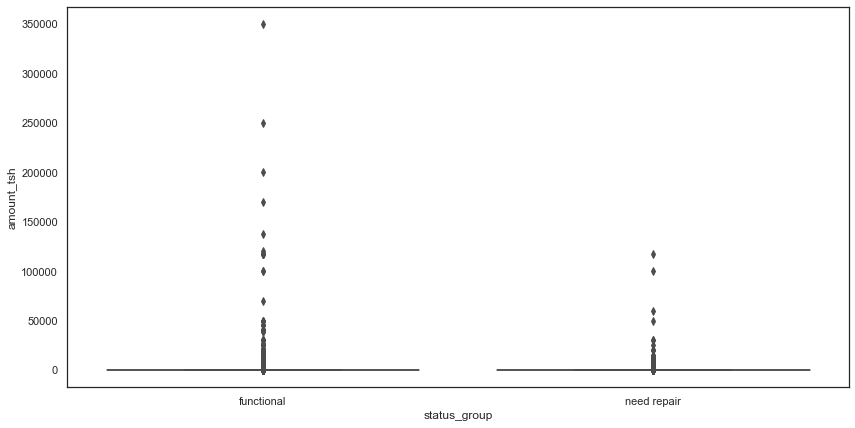

In [78]:
fig, ax = plt.subplots(figsize = (14,7))
sns.boxplot(x='status_group', y='amount_tsh', data=df);

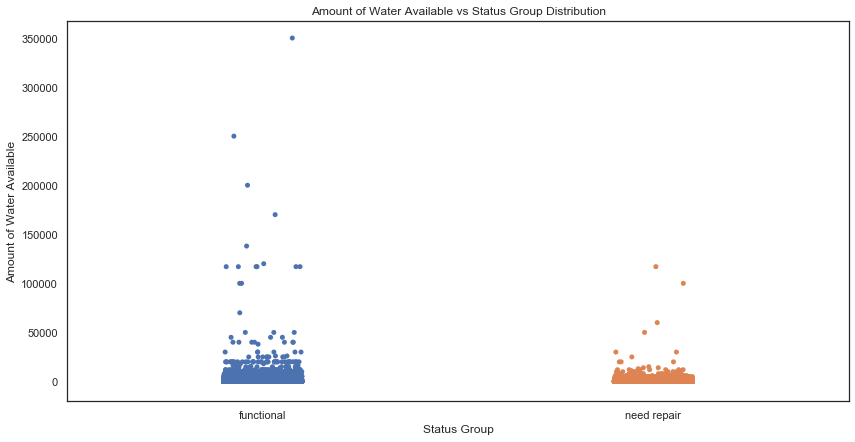

In [79]:
fig, ax = plt.subplots(figsize = (14,7))
sns.stripplot(x='status_group', y='amount_tsh', data=df);
ax.set_ylabel('Amount of Water Available');
ax.set_xlabel('Status Group');
ax.set_title('Amount of Water Available vs Status Group Distribution');

From our boxplot and stripplot, we can see the distribution of status groups and amount of water available to waterpoint. We can also notice that there is one large outlier with roughly around 350000 amount of water. And we can see that functional wells tend to have higher amount_tsh in comparison to non functional and need repair wells.

## Population

In [80]:
df.population.isna().sum()

0

In [81]:
df[df['population'] < 0]

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded


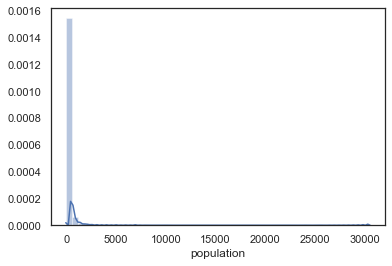

In [82]:
sns.distplot(df['population'])

In [83]:
# Convert to log population as it is skewed to the right

## status_group vs gps_height:

gps_height refers to the altitude of the well. We will see if we can see any relationship between the two.

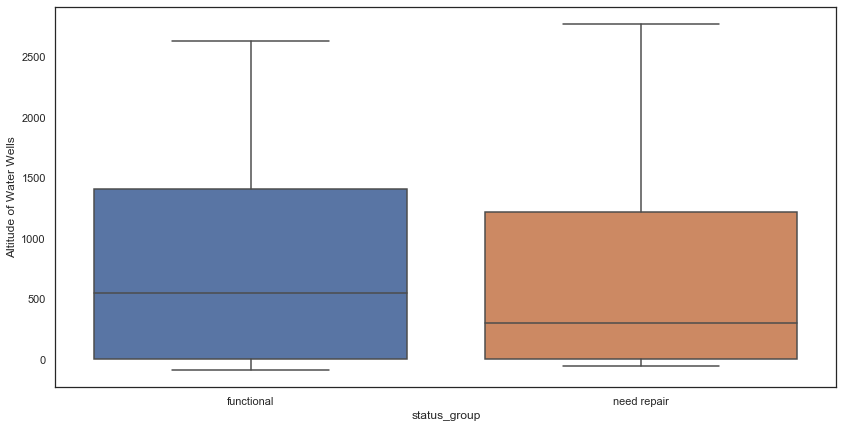

In [84]:
fig, ax = plt.subplots(figsize = (14,7))
sns.boxplot(df['status_group'], df['gps_height']);
ax.set_ylabel('Altitude of Water Wells');

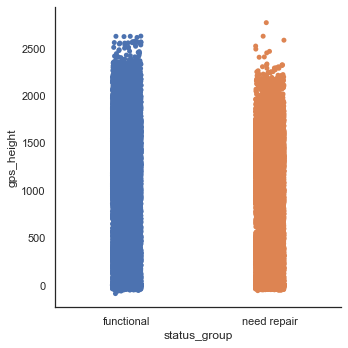

In [85]:
sns.catplot(x = 'status_group', y= 'gps_height', data=df, kind='strip');


Stats Test:

In [86]:
df[df['status_group'] == 'functional']

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
0,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,0,1999,gravity,vwc,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,Other,Missing,1,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013
2,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,1,2009,gravity,vwc,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013
4,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,0,True,None,Missing,1,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011
5,functional,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,Tanga,8,Mkinga,Moa,1,True,VWC,Zingibali,1,2009,submersible,vwc,per bucket,salty,salty,enough,other,other,unknown,communal standpipe multiple,communal standpipe,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,Water Board,Losaa Kia water supply,1,1999,gravity,water board,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013
59396,functional,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,VWC,Ikondo electrical water sch,1,1996,gravity,vwc,annually,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,2011
59397,functional,0.0,Missing,0,Missing,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,0,True,VWC,Missing,0,0,handpump,vwc,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2011
59398,functional,0.0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,0,True,VWC,Missing,1,0,handpump,vwc,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2011


Hypothesis Testing:

Null hypothesis: proportion of altitudes that are functional is equal to need repair

We will use two sample t-test for mean

In [87]:
func_altitude_df = df[df.status_group == 'functional']['gps_height']
not_func_altitude_df = df[df.status_group == 'need repair']['gps_height']

In [88]:
func_altitude_df

0        1390
1        1399
2         686
4           0
5           0
         ... 
59395    1210
59396    1212
59397       0
59398       0
59399     191
Name: gps_height, Length: 32259, dtype: int64

In [89]:
stats.ttest_ind(func_altitude_df, not_func_altitude_df)

Ttest_indResult(statistic=27.715058614587413, pvalue=5.427740577882535e-168)

From our stats test, we can see that our p-value is extremely low so we can reject the null hypothesis and can say this is statistically significant.

## status_group vs population:

In [90]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

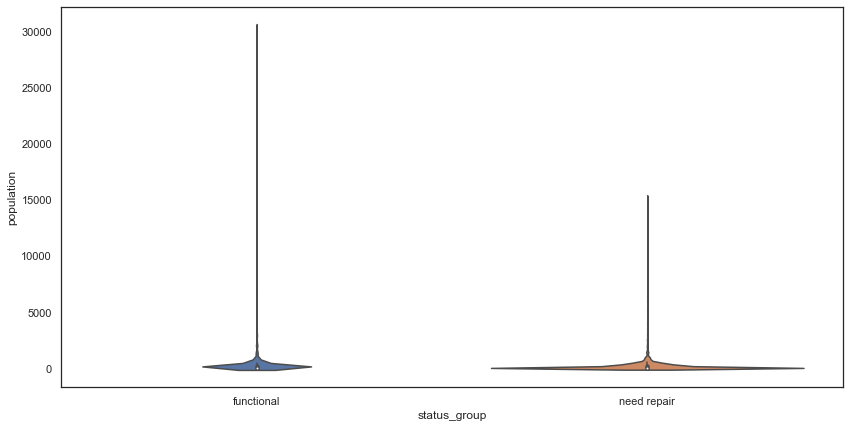

In [91]:
fig, ax = plt.subplots(figsize = (14,7))
sns.violinplot(df['status_group'], df['population']);

## quality_group by different status groups

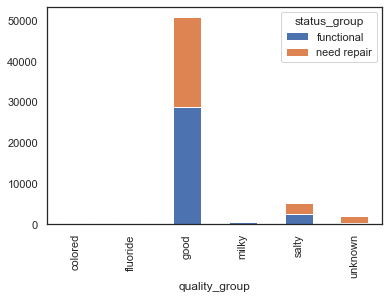

In [92]:
pd.crosstab(df['quality_group'], df['status_group']).plot.bar(stacked=True);


We can see here that quality_group which indicates water quality as mostly good. There are some salty and unknown, but the quality of most of water wells are in good condition. To 

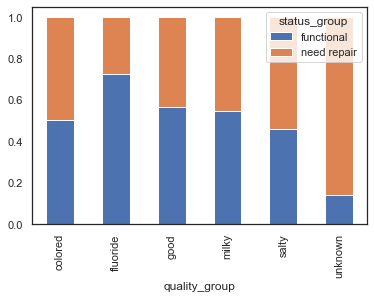

In [93]:
pd.crosstab(df['quality_group'], df['status_group'], normalize='index').plot.bar(stacked=True);

# plt.tight_layout();

Here we can see that if water wells water quality is unknown it is going to be non functional most of the times. I wanted to show the percentage of each status groups.

## water_quality by different status groups 

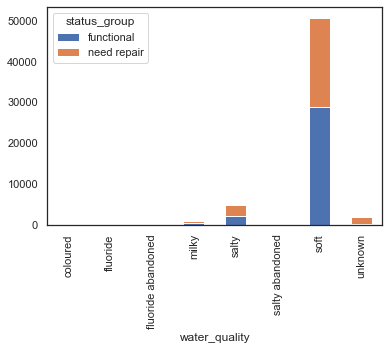

In [94]:
pd.crosstab(df['water_quality'], df['status_group']).plot.bar(stacked=True);


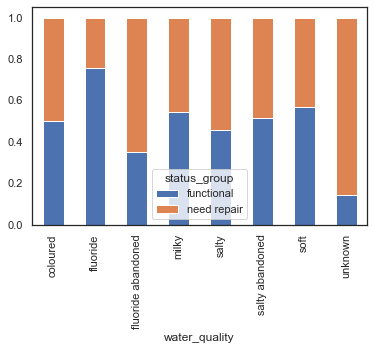

In [95]:
pd.crosstab(df['water_quality'], df['status_group'], normalize='index').plot.bar(stacked=True);
# plt.tight_layout()

## waterpoint_type by different status groups

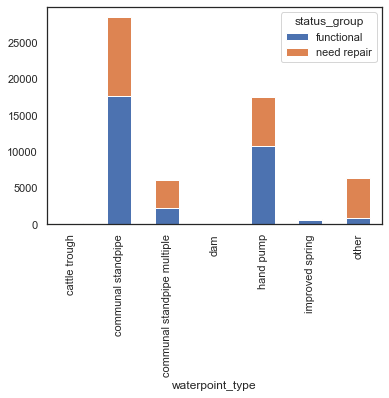

In [96]:
pd.crosstab(df['waterpoint_type'], df['status_group']).plot.bar(stacked=True);


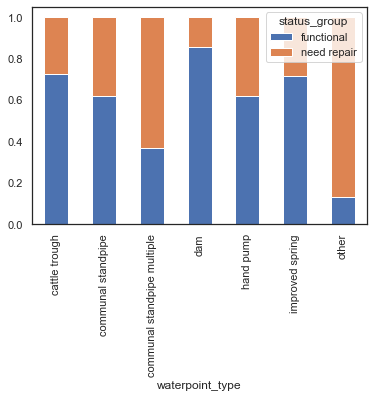

In [97]:
pd.crosstab(df['waterpoint_type'], df['status_group'], normalize='index').plot.bar(stacked=True);


## source_class by different status groups

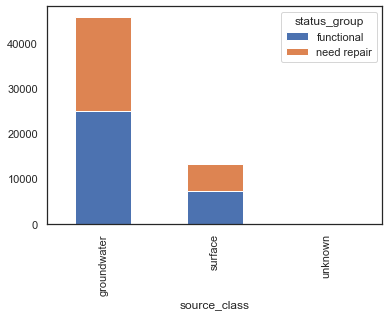

In [98]:
pd.crosstab(df['source_class'], df['status_group']).plot.bar(stacked=True);


We can note here that most of the water wells are groundwater.

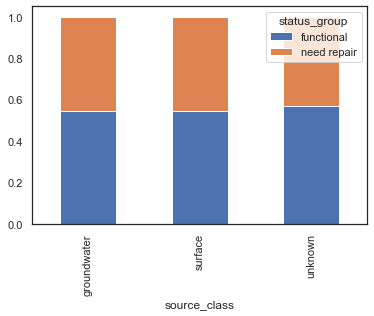

In [99]:
pd.crosstab(df['source_class'], df['status_group'], normalize='index').plot.bar(stacked=True);


In [100]:
df

,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
0,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,VWC,Roman,0,1999,gravity,vwc,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,functional,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,Other,Missing,1,2010,gravity,wug,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013
2,functional,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,1,2009,gravity,vwc,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013
3,need repair,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,VWC,Missing,1,1986,submersible,vwc,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013
4,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,0,True,None,Missing,1,0,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,Water Board,Losaa Kia water supply,1,1999,gravity,water board,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013
59396,functional,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,VWC,Ikondo electrical water sch,1,1996,gravity,vwc,annually,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,2011
59397,functional,0.0,Missing,0,Missing,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,0,True,VWC,Missing,0,0,handpump,vwc,monthly,fluoride,fluoride,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2011
59398,functional,0.0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,0,True,VWC,Missing,1,0,handpump,vwc,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2011


## payment_type by status groups

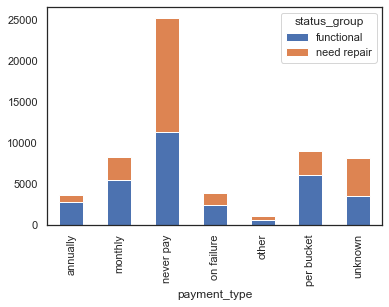

In [101]:
pd.crosstab(df['payment_type'], df['status_group']).plot.bar(stacked=True);
plt.savefig('./plots/payment_bar.png', bbox_inches='tight')


Upon seeing this graph, I saw that there are alot of 'never pay' values. One thing I can tell is that maybe there are less maintenance people as it is a free wellpoint. It is probably fair to say that well points that require payments probably have someone taking care of the wellpoints. But I am a bit concerned to see that there are still alot of need repair well points even though they are paying regularly.

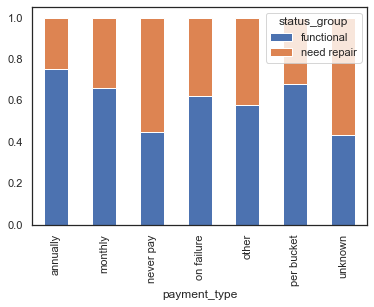

In [102]:
pd.crosstab(df['payment_type'], df['status_group'], normalize='index').plot.bar(stacked=True);


We can see here that by proportions that if they pay, we can note that alot of times it is functional mostly. For example, if they paid annually, then the probability that the water well is functional is roughly at 0.78.

## Construction year

In [103]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

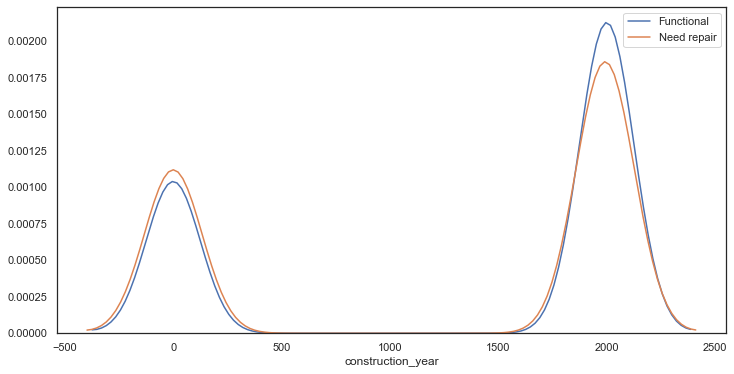

In [104]:
fig, ax = plt.subplots(figsize=(12,6))

sns.distplot(df[df['status_group'].eq('functional')]['construction_year'], hist = False, label='Functional')
sns.distplot(df[df['status_group'].eq('need repair')]['construction_year'], hist=False, label='Need repair')


Here we can see that there are alot of 0 values. So we can ignore that part for now and just look at the years not including 0s.

In [105]:
viz_df = df.loc[df['construction_year'] != 0]

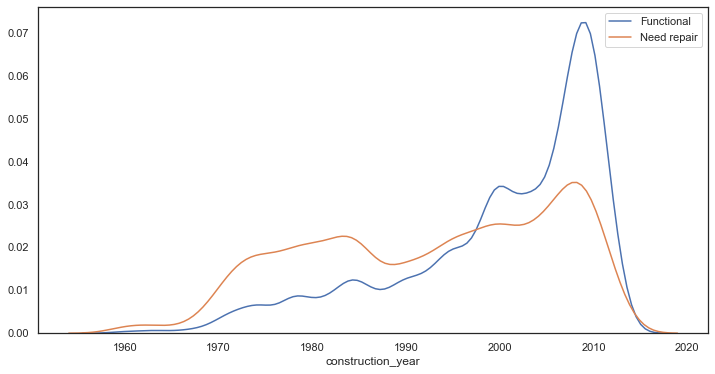

In [106]:
fig, ax = plt.subplots(figsize=(12,6))

sns.distplot(viz_df[viz_df['status_group'].eq('functional')]['construction_year'], hist = False, label='Functional')
sns.distplot(viz_df[viz_df['status_group'].eq('need repair')]['construction_year'], hist=False, label='Need repair')
plt.savefig('./plots/construction_year_line.png', bbox_inches='tight')


Now this is way better to view the relationship. We can clearly note here that more functional waterwells are from earlier construction year built. 

But to fix the 0s in the construction_year, I will just use the mean of construction year column to define 0s.

In [107]:
df[df['construction_year'] > 0]['construction_year'].mean()

1996.8146855857951

In [108]:
df['construction_year'] = np.where(df['construction_year'].eq(0), round(df[df['construction_year'] > 0]['construction_year'].mean()), df['construction_year'])

In [132]:
# Hypothesis Testing: two sample z test
func_df = df[df['status_group'] == 'functional']['construction_year']
repair_df = df[df['status_group'] == 'need repair']['construction_year']
t_stat, pval =  stats.ttest_ind(func_df, repair_df)
# If t_stat > critical_value Reject Null Hypothesis
# print(p)
# If p < alpha  # Reject Null Hypothesis
print(f'T_STAT: {t_stat}, P_VAL: {pval}')


T_STAT: 56.86230274485065, P_VAL: 0.0


Seeing that there is p_value of 0 we know that construction_year is statistically significant to status_group.

In [128]:
df.status_group.value_counts()

functional     32259
need repair    27141
Name: status_group, dtype: int64

Stat test for quanitity and status_group:

In [109]:
df.quantity.value_counts() ## 

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [110]:
ct = pd.crosstab(df['quantity'], df['status_group'])

In [111]:
# HYPOTHESIS TEST:
## Ho: proportions are all same
## H1: they are not equal

# We will use chi squared test as we will be working with categorical variables
stat, p, dof, expected = stats.chi2_contingency(ct)
print(f'stat_val: {stat}, p_value: {p}, df: {dof}, expected: {expected}')
crit_val = stats.chi2.ppf(0.95, dof)
print('critical_val: ', crit_val)

stat_val: 8625.382962828544, p_value: 0.0, df: 4, expected: [[ 3392.08272727  2853.91727273]
 [18022.67969697 15163.32030303]
 [ 8216.26954545  6912.73045455]
 [ 2199.47727273  1850.52272727]
 [  428.49075758   360.50924242]]
critical_val:  9.487729036781154


Here we can see that p value is 0 which means we can reject the null hypothesis and define that it is statistically significant. 

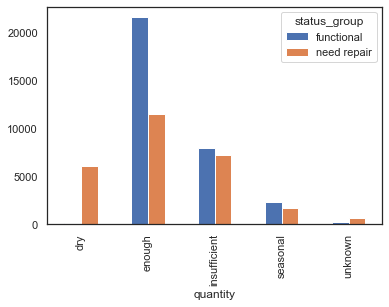

In [112]:
pd.crosstab(df['quantity'], df['status_group']).plot.bar()

We can see that the well is functional if there is enough water and it is not functional if well is dry.

##  permit:

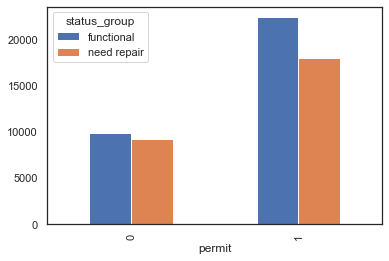

In [113]:
pd.crosstab(df['permit'], df['status_group']).plot.bar()
plt.savefig('./plots/permit_bar.png', bbox_inches='tight')


Looking at whether having a permit or not has a strong tie to the status_group, we can note that there isn't really a strong tie in terms of functional or need repair. However, we can see that when they do have permit, there are more wells overall with a permit than without.

In [114]:
df['permit'].value_counts()

1    40347
0    19053
Name: permit, dtype: int64

Statistical Test using two sample z test for proportion

In [115]:
 df.groupby('status_group').permit.value_counts()

status_group  permit
functional    1         22373
              0          9886
need repair   1         17974
              0          9167
Name: permit, dtype: int64

In [116]:
permit_func_success = df.groupby('status_group').permit.value_counts()[0]
permit_repair_success = df.groupby('status_group').permit.value_counts()[2]
func_n = len(df[df['status_group'] == 'functional']['permit'])
repair_n = len(df[df['status_group'] == 'need repair']['permit'])
permit_func_prop = permit_func_success / func_n
permit_repair_prop = permit_repair_success / repair_n


In [117]:
overall_success = (permit_func_success + permit_repair_success ) / (func_n + repair_n)
print('overall success: ', overall_success)
z_stat_value = (permit_func_prop - permit_repair_prop) / (np.sqrt( (overall_success * (1-overall_success) * (1/func_n + 1/repair_n)) )) 
print('z stat value: ', z_stat_value)
# critical value - 1.96
# Because we are using two tailed test, we know our z stat value falls in rejection area, so we will reject the hypothesis

overall success:  0.6792424242424242
z stat value:  8.14057321100279


From our statistical test because our z stat value is higher than our critical value at 1.96, we can reject the null hypothesis. There is a significance between the two

In [118]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [119]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [120]:
df.to_csv('./Data/modeling.csv',index=False)